In [763]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

## Predicting Life Expectancy at Birth using Global Demographic Data


Problem:
- Life expectancy at birth is a major indicator of a country’s overall health
- It is important for someone to understand their life expectancy (financial planning, healthcare planning, etc)
- We want to see if we can accurately predict average life expectancy at birth using demographic data from countries all over the world
- Will also help us determine which factors play the largest role in predicting life expectancy

Question: Can we accurately predict someone’s life expectancy given specific demographic factors?

Which ML model is the best to predict average life expectancy?
- Decision trees?
- Clustering?
- Random forests?
- kNN?

Addition question we need to explore... should we build different models for males and females?



In [973]:
#importing data
data = pd.read_csv("/Users/kendallscherer/Desktop/ds3001_v2/DS-3001/JTERM/UN_demo.csv",encoding='unicode_escape', header=1)
data


/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/478161895.py:2: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/kendallscherer/Desktop/ds3001_v2/DS-3001/JTERM/UN_demo.csv",encoding='unicode_escape', header=1)


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,567,490,231,258,204,368,416,319,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546,477,219,240,197,353,396,310,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,536,470,213,233,193,345,386,304,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [974]:
#dropping columns
columns_to_drop = ['Index', 'Variant', 'Notes', 'Location code', 'ISO2 Alpha-code', 
                   'SDMX code**', 'Parent code', 'Total Population, as of 1 January (thousands)', 
                   'Population Annual Doubling Time (years)', 'Population Change (thousands)', 'Population Change (thousands)', 'Male Population, as of 1 July (thousands)',
                   'Births (thousands)', 'Births by women aged 15 to 19 (thousands)', 'Female Population, as of 1 July (thousands)', 'Total Deaths (thousands)', 'Male Deaths (thousands)',
                   'Female Deaths (thousands)', 'Male Life Expectancy at Birth (years)', 'Female Life Expectancy at Birth (years)', 'Male Life Expectancy at Age 15 (years)', 'Female Life Expectancy at Age 15 (years)',
                   'Male Life Expectancy at Age 65 (years)', 'Female Life Expectancy at Age 65 (years)', 'Male Life Expectancy at Age 80 (years)', 'Female Life Expectancy at Age 80 (years)', 'Infant Deaths, under age 1 (thousands)',
                   'Live Births Surviving to Age 1 (thousands)', 'Under-Five Deaths, under age 5 (thousands)', 'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)', 'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
                   'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)', 'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)', 'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
                   'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)', 'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)', 'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
                   'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)', 'Net Number of Migrants (thousands)',
                   'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)','Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)', 'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)', 
                    'Life Expectancy at Age 15, both sexes (years)', 'Life Expectancy at Age 65, both sexes (years)', 'Life Expectancy at Age 80, both sexes (years)',
                    'Crude Death Rate (deaths per 1,000 population)', 'Infant Mortality Rate (infant deaths per 1,000 live births)','Under-Five Mortality (deaths under age 5 per 1,000 live births)','Median Age, as of 1 July (years)','Sex Ratio at Birth (males per 100 female births)','Crude Birth Rate (births per 1,000 population)',
                    'Total Fertility Rate (live births per woman)','Net Reproduction Rate (surviving daughters per woman)','Natural Change, Births minus Deaths (thousands)','Population Density, as of 1 July (persons per square km)']

data = data.drop(columns_to_drop, axis=1)

In [975]:
#choosing only rows with columns
just_countries = data[data['Type'] == 'Country/Area']
just_countries = just_countries.drop(['Region, subregion, country or area *'], axis=1)



In [976]:
#only years  2000-2021
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
just_countries_years = just_countries[just_countries['Year'].isin(years)]
just_countries_years

,ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Population Sex Ratio, as of 1 July (males per 100 females)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,BDI,Country/Area,2000.0,6 308,97.0,26.6,2.03,31.1,47.5,-6.3
1783,BDI,Country/Area,2001.0,6 466,97.0,27.6,2.91,31.0,48.4,1.5
1784,BDI,Country/Area,2002.0,6 649,97.1,29.3,2.68,31.0,49.9,-2.5
1785,BDI,Country/Area,2003.0,6 861,97.1,30.5,3.58,30.9,50.9,5.4
1786,BDI,Country/Area,2004.0,7 120,97.2,31.9,3.85,30.9,52.0,6.6
...,...,...,...,...,...,...,...,...,...,...
20591,WLF,Country/Area,2017.0,12,93.6,6.0,-1.11,30.0,77.5,-16.7
20592,WLF,Country/Area,2018.0,12,93.3,5.6,-0.92,30.0,77.9,-14.4
20593,WLF,Country/Area,2019.0,12,93.1,6.1,-0.8,30.0,79.6,-14.5
20594,WLF,Country/Area,2020.0,12,93.0,5.2,-0.22,30.0,78.8,-7.1


In [977]:
#random "..." throughout --> replacing them with NAs to then drop
just_countries_years.replace('...', np.nan, inplace=True)


/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/51462656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years.replace('...', np.nan, inplace=True)


/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


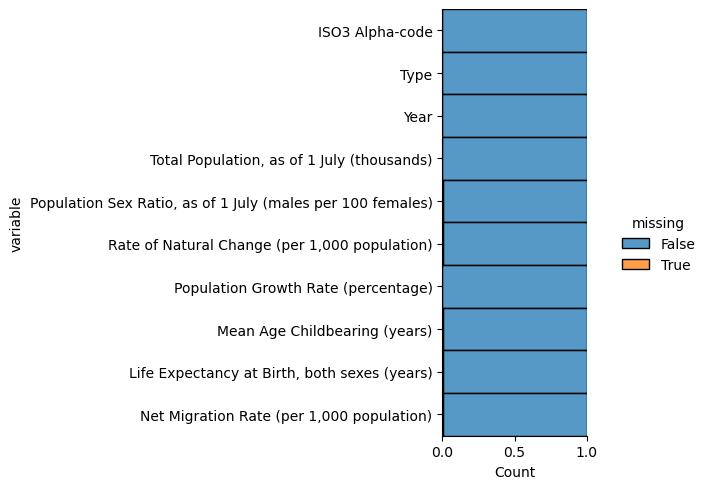

In [978]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

#no missing values!!!

In [979]:
#drop the one column with a bunch of NAs and then delete the rest of the NAs
just_countries_years = just_countries_years.dropna()

/Users/kendallscherer/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


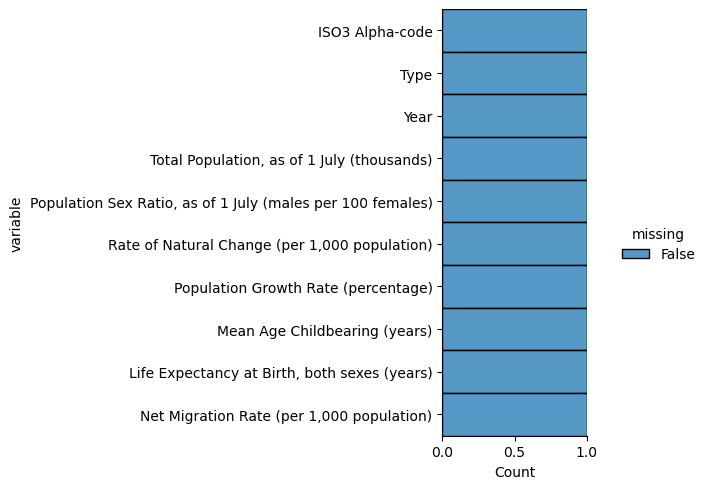

In [980]:
import seaborn as sns
sns.displot(
    data=just_countries_years.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [981]:
just_countries_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 1782 to 20595
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ISO3 Alpha-code                                             5192 non-null   object 
 1   Type                                                        5192 non-null   object 
 2   Year                                                        5192 non-null   float64
 3   Total Population, as of 1 July (thousands)                  5192 non-null   object 
 4   Population Sex Ratio, as of 1 July (males per 100 females)  5192 non-null   object 
 5   Rate of Natural Change (per 1,000 population)               5192 non-null   object 
 6   Population Growth Rate (percentage)                         5192 non-null   object 
 7   Mean Age Childbearing (years)                               5192 non-null   object 
 8  

In [982]:
data2 = just_countries_years 

In [983]:
# Function to remove spaces and convert to float
#CONVERTING OBJECTS TO FLOATS!!! 
import re

def remove_spaces_and_convert_to_float(value):
    if isinstance(value, str):
        try:
            value_without_space = re.sub(r'\s+', '', value)
            return float(value_without_space)
        except ValueError:
            print(f"Could not convert to float: {value}")
            return None  # or any other handling for invalid values
    else:
        return value

# Apply the function to the column
just_countries_years['Total Population, as of 1 July (thousands)'] = just_countries_years['Total Population, as of 1 July (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Population Density'] = just_countries_years['Population Density'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)'] = just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Median Age, as of 1 July (years)'] = just_countries_years['Median Age, as of 1 July (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Natural Change, Births minus Deaths (thousands)'] = just_countries_years['Natural Change, Births minus Deaths (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Rate of Natural Change (per 1,000 population)'] = just_countries_years['Rate of Natural Change (per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Population Growth Rate (percentage)'] = just_countries_years['Population Growth Rate (percentage)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Crude Birth Rate (births per 1,000 population)'] = just_countries_years['Crude Birth Rate (births per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Total Fertility Rate (live births per woman)'] = just_countries_years['Total Fertility Rate (live births per woman)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Net Reproduction Rate (surviving daughters per woman)'] = just_countries_years['Net Reproduction Rate (surviving daughters per woman)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Mean Age Childbearing (years)'] = just_countries_years['Mean Age Childbearing (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Sex Ratio at Birth (males per 100 female births)'] = just_countries_years['Sex Ratio at Birth (males per 100 female births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Crude Death Rate (deaths per 1,000 population)'] = just_countries_years['Crude Death Rate (deaths per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Life Expectancy at Birth, both sexes (years)'] = just_countries_years['Life Expectancy at Birth, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Life Expectancy at Age 15, both sexes (years)'] = just_countries_years['Life Expectancy at Age 15, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Life Expectancy at Age 65, both sexes (years)'] = just_countries_years['Life Expectancy at Age 65, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Life Expectancy at Age 80, both sexes (years)'] = just_countries_years['Life Expectancy at Age 80, both sexes (years)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'] = just_countries_years['Infant Mortality Rate (infant deaths per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Under-Five Mortality (deaths under age 5 per 1,000 live births)'] = just_countries_years['Under-Five Mortality (deaths under age 5 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)'] = just_countries_years['Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)'] = just_countries_years['Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
#just_countries_years['Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)'] = just_countries_years['Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
just_countries_years['Net Migration Rate (per 1,000 population)'] = just_countries_years['Net Migration Rate (per 1,000 population)'].apply(lambda x: remove_spaces_and_convert_to_float(x))

just_countries_years.info()

/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/4278477524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Total Population, as of 1 July (thousands)'] = just_countries_years['Total Population, as of 1 July (thousands)'].apply(lambda x: remove_spaces_and_convert_to_float(x))
/var/folders/6m/rxmrjq2j1ds281fy_bft3klr0000gn/T/ipykernel_99432/4278477524.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_countries_years['Population Sex Ratio, as of 1 July (males

<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 1782 to 20595
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ISO3 Alpha-code                                             5192 non-null   object 
 1   Type                                                        5192 non-null   object 
 2   Year                                                        5192 non-null   float64
 3   Total Population, as of 1 July (thousands)                  5192 non-null   float64
 4   Population Sex Ratio, as of 1 July (males per 100 females)  5192 non-null   float64
 5   Rate of Natural Change (per 1,000 population)               5192 non-null   float64
 6   Population Growth Rate (percentage)                         5192 non-null   float64
 7   Mean Age Childbearing (years)                               5192 non-null   float64
 8  

Text(0.5, 1.0, 'Total Population')

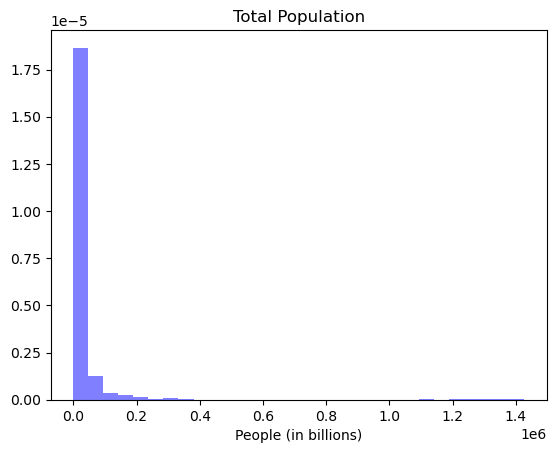

In [984]:
column_data_sex = just_countries_years['Total Population, as of 1 July (thousands)']
plt.hist(column_data_sex, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('People (in billions)')
plt.title('Total Population')

Text(0.5, 1.0, 'Population Sex Ratio (males per 100 females)')

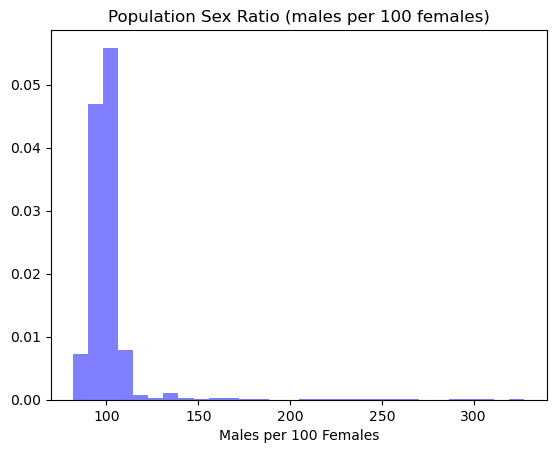

In [985]:
column_data_sex = just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)']
plt.hist(column_data_sex, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('Males per 100 Females')
plt.title('Population Sex Ratio (males per 100 females)')

Text(0.5, 1.0, 'Population Growth Rate (percentage)')

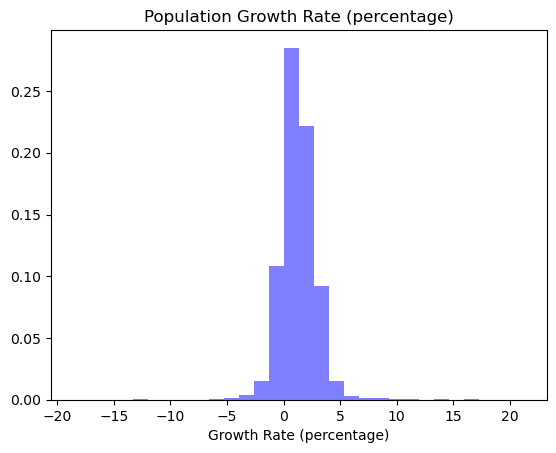

In [986]:
column_data_childbear = just_countries_years['Population Growth Rate (percentage)']
plt.hist(column_data_childbear, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('Growth Rate (percentage)')
plt.title('Population Growth Rate (percentage)')

Text(0.5, 1.0, 'Mean Age Childbearing (years)')

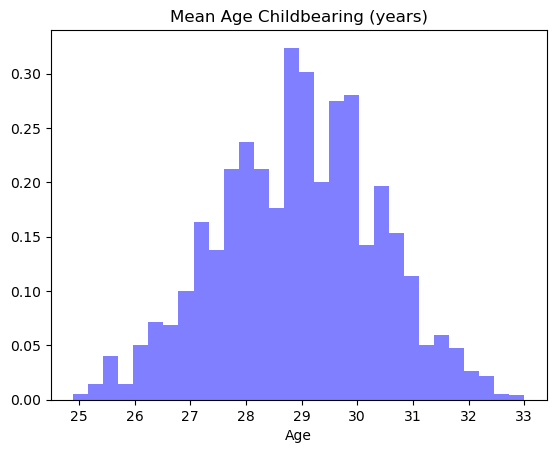

In [987]:
column_data_childbear = just_countries_years['Mean Age Childbearing (years)']
plt.hist(column_data_childbear, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('Age')
plt.title('Mean Age Childbearing (years)')

Text(0.5, 1.0, 'Life Expectancy at Birth, both sexes (years)')

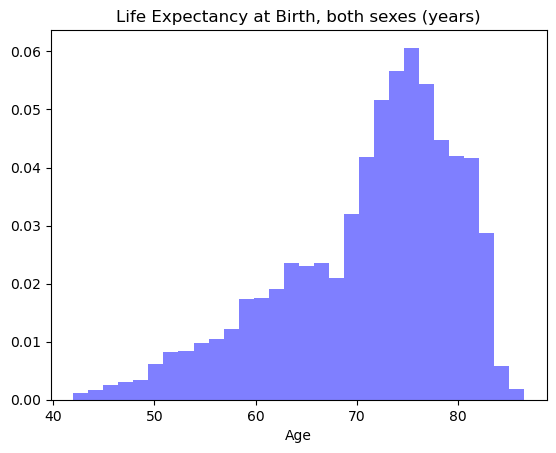

In [988]:
column_data_life = just_countries_years['Life Expectancy at Birth, both sexes (years)']
plt.hist(column_data_life, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('Age')
plt.title('Life Expectancy at Birth, both sexes (years)')


Text(0.5, 1.0, 'Rate of Natural Change (per 1,000 population)')

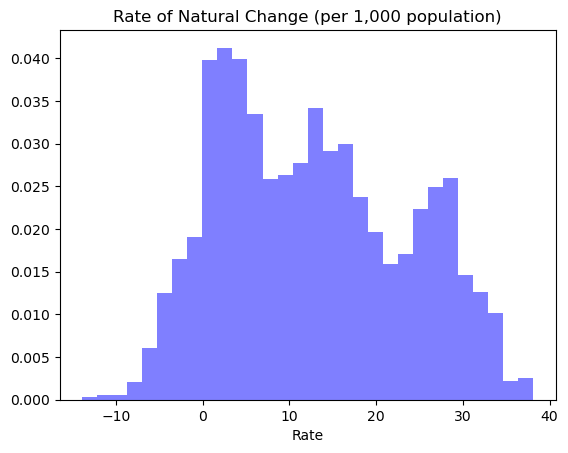

In [989]:
column_data_natural = just_countries_years['Rate of Natural Change (per 1,000 population)']
plt.hist(column_data_natural, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('Rate')
plt.title('Rate of Natural Change (per 1,000 population)')

Net Migration Rate

Text(0.5, 1.0, 'Net Migration Rate (per 1,000 population)')

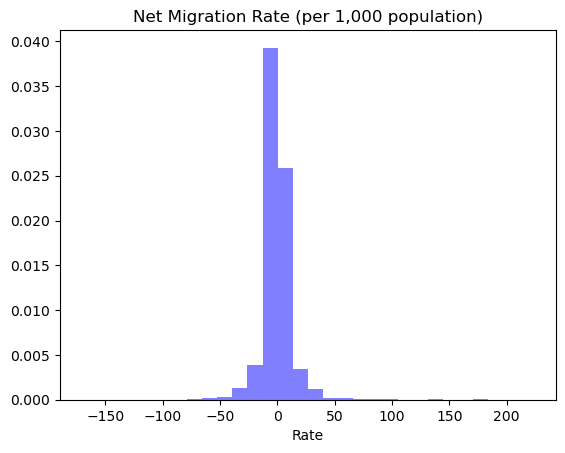

In [990]:
column_data_mig = just_countries_years['Net Migration Rate (per 1,000 population)']
plt.hist(column_data_mig, bins=30, density=True, alpha=0.5, color='blue')
plt.xlabel('Rate')
plt.title('Net Migration Rate (per 1,000 population)')

{'whiskers': [<matplotlib.lines.Line2D at 0x157cd93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x157cd8dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157cd8e50>],
 'medians': [<matplotlib.lines.Line2D at 0x157cd26d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x157cd05d0>],
 'means': []}

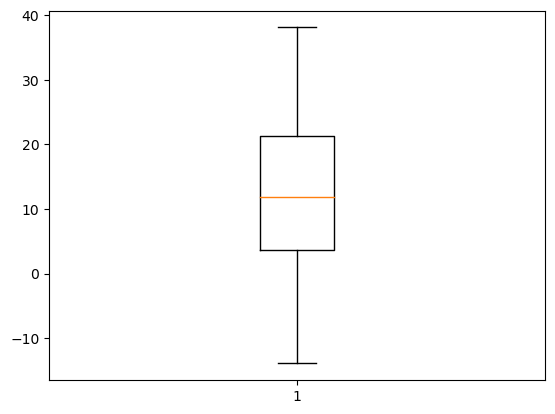

In [991]:
plt.boxplot(just_countries_years['Rate of Natural Change (per 1,000 population)'])

Net Migration Rate

Net Reproduction Rate

Population Density

Population Growth Rate

(array([1.44996742e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.89993485e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.44996742e-04, 5.79986970e-04, 1.59496417e-03, 4.20490553e-03,
        1.53696547e-02, 1.08312567e-01, 2.85063596e-01, 2.21700019e-01,
        9.17829379e-02, 1.53696547e-02, 2.89993485e-03, 1.73996091e-03,
        1.01497720e-03, 5.79986970e-04, 5.79986970e-04, 1.44996742e-04,
        5.79986970e-04, 0.00000000e+00, 2.89993485e-04, 1.44996742e-04,
        1.44996742e-04, 1.44996742e-04]),
 array([-1.85900000e+01, -1.72616667e+01, -1.59333333e+01, -1.46050000e+01,
        -1.32766667e+01, -1.19483333e+01, -1.06200000e+01, -9.29166667e+00,
        -7.96333333e+00, -6.63500000e+00, -5.30666667e+00, -3.97833333e+00,
        -2.65000000e+00, -1.32166667e+00,  6.66666667e-03,  1.33500000e+00,
         2.66333333e+00,  3.99166667e+00,  5.32000000e+00,  6.64833333e+00,
         7.97666667e+00,  9.30500000e+00,  1.06333333e+01,  1.19616667e+01

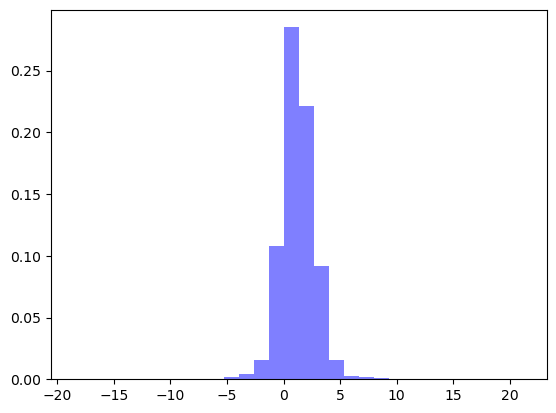

In [992]:
column_data_popgrowth = just_countries_years['Population Growth Rate (percentage)']
plt.hist(column_data_popgrowth, bins=30, density=True, alpha=0.5, color='blue')

Sex Ratio (males per 100 females)

(array([7.26970333e-03, 4.69119367e-02, 5.58755515e-02, 7.85786703e-03,
        7.29322988e-04, 2.11738932e-04, 1.12927430e-03, 2.82318576e-04,
        1.17632740e-04, 2.82318576e-04, 2.58792028e-04, 4.70530960e-05,
        1.41159288e-04, 0.00000000e+00, 2.35265480e-05, 9.41061919e-05,
        1.41159288e-04, 4.70530960e-05, 9.41061919e-05, 4.70530960e-05,
        1.17632740e-04, 4.70530960e-05, 1.17632740e-04, 2.35265480e-05,
        2.35265480e-05, 7.05796440e-05, 7.05796440e-05, 4.70530960e-05,
        2.35265480e-05, 4.70530960e-05]),
 array([ 81.9       ,  90.08666667,  98.27333333, 106.46      ,
        114.64666667, 122.83333333, 131.02      , 139.20666667,
        147.39333333, 155.58      , 163.76666667, 171.95333333,
        180.14      , 188.32666667, 196.51333333, 204.7       ,
        212.88666667, 221.07333333, 229.26      , 237.44666667,
        245.63333333, 253.82      , 262.00666667, 270.19333333,
        278.38      , 286.56666667, 294.75333333, 302.94      ,
      

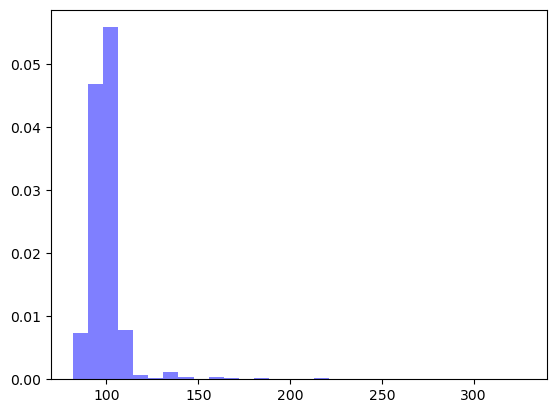

In [993]:
column_data_sexratio = just_countries_years['Population Sex Ratio, as of 1 July (males per 100 females)']
plt.hist(column_data_sexratio, bins=30, density=True, alpha=0.5, color='blue')

Total Fertility Rate

Total Population

### MODEL BUILDING

Dropping more columns that can't/shouldn't be used in the ML process


In [994]:
just_countries_years = just_countries_years.drop(['ISO3 Alpha-code','Type','Year'], axis=1)
just_countries_years

,"Total Population, as of 1 July (thousands)","Population Sex Ratio, as of 1 July (males per 100 females)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,6308.0,97.0,26.6,2.03,31.1,47.5,-6.3
1783,6466.0,97.0,27.6,2.91,31.0,48.4,1.5
1784,6649.0,97.1,29.3,2.68,31.0,49.9,-2.5
1785,6861.0,97.1,30.5,3.58,30.9,50.9,5.4
1786,7120.0,97.2,31.9,3.85,30.9,52.0,6.6
...,...,...,...,...,...,...,...
20591,12.0,93.6,6.0,-1.11,30.0,77.5,-16.7
20592,12.0,93.3,5.6,-0.92,30.0,77.9,-14.4
20593,12.0,93.1,6.1,-0.80,30.0,79.6,-14.5
20594,12.0,93.0,5.2,-0.22,30.0,78.8,-7.1


In [995]:
just_countries_years

,"Total Population, as of 1 July (thousands)","Population Sex Ratio, as of 1 July (males per 100 females)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
1782,6308.0,97.0,26.6,2.03,31.1,47.5,-6.3
1783,6466.0,97.0,27.6,2.91,31.0,48.4,1.5
1784,6649.0,97.1,29.3,2.68,31.0,49.9,-2.5
1785,6861.0,97.1,30.5,3.58,30.9,50.9,5.4
1786,7120.0,97.2,31.9,3.85,30.9,52.0,6.6
...,...,...,...,...,...,...,...
20591,12.0,93.6,6.0,-1.11,30.0,77.5,-16.7
20592,12.0,93.3,5.6,-0.92,30.0,77.9,-14.4
20593,12.0,93.1,6.1,-0.80,30.0,79.6,-14.5
20594,12.0,93.0,5.2,-0.22,30.0,78.8,-7.1


In [996]:
#looking at range - just curious - crazy how large it is!!
range = (just_countries_years['Life Expectancy at Birth, both sexes (years)'].max()) - (just_countries_years['Life Expectancy at Birth, both sexes (years)'].min()) 
range

44.5

Splitting data into test, tune, and train (80-10-10)


In [997]:
X = just_countries_years.drop('Life Expectancy at Birth, both sexes (years)', axis=1)
y = just_countries_years['Life Expectancy at Birth, both sexes (years)']

In [998]:
y

1782     47.5
1783     48.4
1784     49.9
1785     50.9
1786     52.0
         ... 
20591    77.5
20592    77.9
20593    79.6
20594    78.8
20595    78.4
Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64

In [999]:
#checking to make sure life expectancy dropped
X

,"Total Population, as of 1 July (thousands)","Population Sex Ratio, as of 1 July (males per 100 females)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),Mean Age Childbearing (years),"Net Migration Rate (per 1,000 population)"
1782,6308.0,97.0,26.6,2.03,31.1,-6.3
1783,6466.0,97.0,27.6,2.91,31.0,1.5
1784,6649.0,97.1,29.3,2.68,31.0,-2.5
1785,6861.0,97.1,30.5,3.58,30.9,5.4
1786,7120.0,97.2,31.9,3.85,30.9,6.6
...,...,...,...,...,...,...
20591,12.0,93.6,6.0,-1.11,30.0,-16.7
20592,12.0,93.3,5.6,-0.92,30.0,-14.4
20593,12.0,93.1,6.1,-0.80,30.0,-14.5
20594,12.0,93.0,5.2,-0.22,30.0,-7.1


In [1000]:
y.info()  

<class 'pandas.core.series.Series'>
Index: 5192 entries, 1782 to 20595
Series name: Life Expectancy at Birth, both sexes (years)
Non-Null Count  Dtype  
--------------  -----  
5192 non-null   float64
dtypes: float64(1)
memory usage: 81.1 KB


In [1001]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=22)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,random_state=48)

Create the kfold object for cross validation

Step 1: Cross validation process

In [1002]:
kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=42)

Step 2: Hyperparameter search --> create the scoring metric we will use to evaluate model + the depth hyperparameter

In [1003]:
scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error']
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

Step 3: Train the model --> build the regression tree object

In [1004]:
#this is the regressor model we will use!
reg=DecisionTreeRegressor(random_state=30)

#setting up search for the best decisiontreeregressor estimator based on r-squared across all different folds
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')

#executing the search
model = search.fit(X_train, y_train)

Use the kfold object and the scoring metric to find the best hyperparameter value for max depth via the grid search method.

In [1037]:
best= model.best_estimator_
print(best) 
#the best depth is 10

DecisionTreeRegressor(max_depth=17, random_state=30)


View the results

In [1028]:
#scores based on depth
#normalized rmse

#Scores: 

#Have negative mean squared error so need to take absolute value and square root to convert to root mean squared error
mean_sq_err = np.sqrt(abs(model.cv_results_['mean_test_neg_mean_squared_error']))

#nothing needs to be done for r2, it is the same
r2= model.cv_results_['mean_test_r2']

#Have negative mean absolute error so need to take absolute value
mae= abs(model.cv_results_['mean_test_neg_mean_absolute_error'])

#Get standard deviations as well...
SDmse =  model.cv_results_['std_test_neg_mean_squared_error']
SDr2= model.cv_results_['std_test_r2']
SDmae= model.cv_results_['std_test_neg_mean_absolute_error']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, mean_sq_err, r2,mae, SDmse,SDr2,SDmae)),
               columns =['depth','rmse','r2','mae',"rmseSD",'r2SD','maeSD'])

print(final_model)

    depth      rmse        r2       mae    rmseSD      r2SD     maeSD
0       1  6.645495  0.409286  5.027088  4.007562  0.044811  0.145108
1       2  5.953529  0.526281  4.435302  3.793344  0.040831  0.200961
2       3  5.376693  0.613765  3.840692  3.222246  0.033606  0.163440
3       4  5.038753  0.660902  3.572160  3.122474  0.033328  0.160659
4       5  4.684667  0.706824  3.243855  3.201548  0.037570  0.189068
5       6  4.287119  0.754321  2.939680  2.687058  0.032661  0.156970
6       7  3.912564  0.795319  2.634045  2.250496  0.027335  0.126807
7       8  3.612054  0.825481  2.359266  1.839476  0.022782  0.105256
8       9  3.428041  0.842832  2.145601  2.086574  0.026593  0.133484
9      10  3.277786  0.856397  1.927132  2.383707  0.030189  0.138485
10     11  3.124031  0.869632  1.739748  2.280813  0.028807  0.135237
11     12  3.029473  0.877438  1.589532  2.236110  0.028313  0.121484
12     13  2.992876  0.880281  1.498029  2.258488  0.029090  0.117748
13     14  2.956294 

Text(0.5, 1.0, 'RMSE')

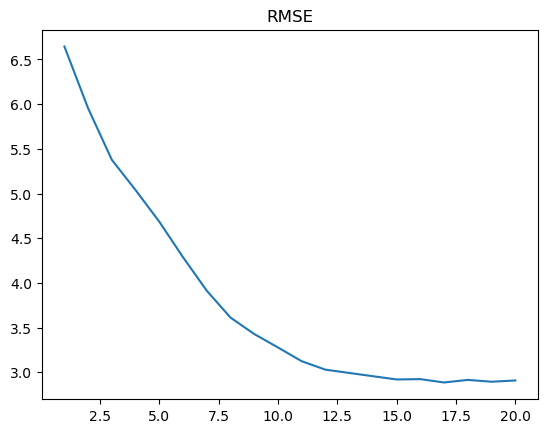

In [1029]:
plt.plot(final_model.depth, final_model.rmse)
plt.title('RMSE')

Text(0.5, 1.0, 'r^2')

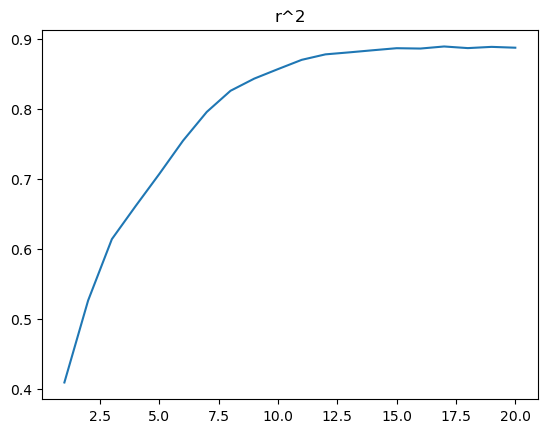

In [1008]:
plt.plot(final_model.depth, final_model.r2)
plt.title('r^2')

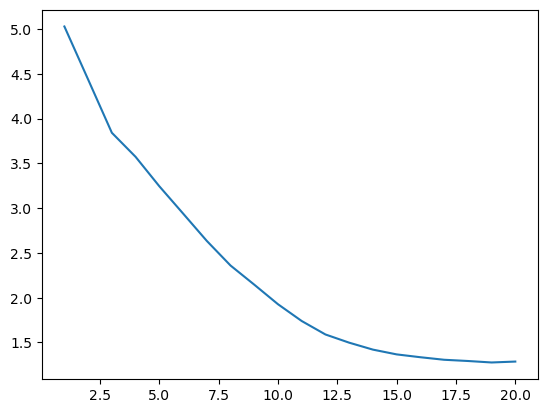

In [1009]:
print(plt.plot(final_model.depth, final_model.mae))

In [1038]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                                                    importance
Rate of Natural Change (per 1,000 population)         0.540084
Total Population, as of 1 July (thousands)            0.169589
Mean Age Childbearing (years)                         0.136833
Population Sex Ratio, as of 1 July (males per 1...    0.103951
Population Growth Rate (percentage)                   0.026904
Net Migration Rate (per 1,000 population)             0.022640


Axes(0.125,0.11;0.775x0.77)


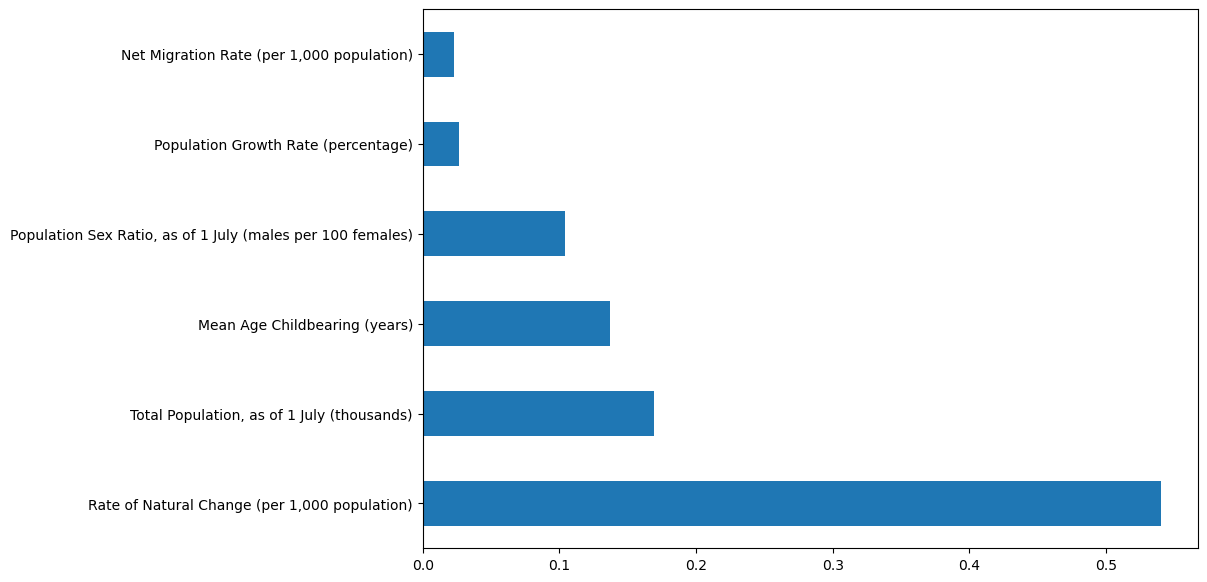

In [1011]:
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

In [1040]:
#setting a max depth of 10

new_best = DecisionTreeRegressor(max_depth = 10, random_state=30)
new_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=30)

In [1041]:
pred=new_best.predict(X_test)
print(pred[:10])

[60.7        74.62626728 65.53333333 48.4        68.93       69.25
 80.9        71.18015873 71.65714286 83.85294118]


In [1042]:
#This number is Rsquared which we want to be close to 1. 
print(metrics.r2_score(y_test, pred))

0.8803710888240271


In [1043]:
#We want this number, RSME, to be less than .5  -
print(np.sqrt(metrics.mean_squared_error(y_test, pred))) 

#MAE we want to be below .5 as well 
print(metrics.mean_absolute_error(y_test, pred)) #nice!

3.0104564562283747
1.955991982740463


In [1045]:
#remaining data

pred=new_best.predict(X_tune)
print(pred[:10])

#just using test data
print(new_best.score(X_tune, y_tune))

[72.6        71.18015873 74.62626728 53.33714286 75.94545455 74.3
 80.42777778 71.18015873 55.7952381  81.76829268]
0.8339244638194622


In [1046]:
# Get the probabilities of the predictions
reg.fit(X_test, y_test)
predictions = reg.predict(X)

In [1047]:
y_test

19721    60.2
16125    74.4
17983    65.5
5890     48.8
7923     68.5
         ... 
3728     54.1
7560     72.6
2514     55.6
14249    82.6
15678    74.6
Name: Life Expectancy at Birth, both sexes (years), Length: 520, dtype: float64

In [1048]:
#country code
top_predictions = [data2['ISO3 Alpha-code'] for just_countries_years['Life Expectancy at Birth, both sexes (years)'] in predictions.argsort()]
top_predictions

[1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-code, Length: 5192, dtype: object,
 1782     BDI
 1783     BDI
 1784     BDI
 1785     BDI
 1786     BDI
         ... 
 20591    WLF
 20592    WLF
 20593    WLF
 20594    WLF
 20595    WLF
 Name: ISO3 Alpha-

In [1049]:
#life expectancy
top_predictions = [data2['Life Expectancy at Birth, both sexes (years)'] for just_countries_years['Life Expectancy at Birth, both sexes (years)'] in predictions.argsort()]
top_predictions

[1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782     47.5
 1783     48.4
 1784     49.9
 1785     50.9
 1786     52.0
          ... 
 20591    77.5
 20592    77.9
 20593    79.6
 20594    78.8
 20595    78.4
 Name: Life Expectancy at Birth, both sexes (years), Length: 5192, dtype: float64,
 1782   

Ranking out of the 5,192 life expectancy data points 

The lowest five for life expectancy (all Burundi)

- 47.5 (#59)
- 48.4 (#78)
- 49.9 (#101)
- 50.9 (#142)
- 52.0 (#191)

The lowest five for life expectancy (all Wallis and Futuna)

- 77.5 (#3902)
- 77.9 (#4016)
- 79.6 (#4384)
- 78.8 (#4195)
- 78.4 (#4118)

Because the top and bottom 5 were all the same country, here must be something, some other predictor, that is making our model think they are the lowest and highest. We should look more into each of them. 
Wallis and Futana is actually a territory and has a low population, so one of its metric is probably weird and that is affecting it. 




In [1020]:
sorted = data2.sort_values(by = 'Life Expectancy at Birth, both sexes (years)', ascending =True)
sorted


,ISO3 Alpha-code,Type,Year,"Total Population, as of 1 July (thousands)","Population Sex Ratio, as of 1 July (males per 100 females)","Rate of Natural Change (per 1,000 population)",Population Growth Rate (percentage),Mean Age Childbearing (years),"Life Expectancy at Birth, both sexes (years)","Net Migration Rate (per 1,000 population)"
3151,ZWE,Country/Area,2001.0,11911.0,90.3,16.9,0.55,28.4,42.0,-11.4
4667,SWZ,Country/Area,2005.0,1072.0,92.8,12.7,0.53,28.4,42.1,-7.4
4666,SWZ,Country/Area,2004.0,1066.0,92.8,13.3,0.61,28.4,42.5,-7.2
4740,LSO,Country/Area,2006.0,1977.0,95.7,8.2,0.26,28.5,42.9,-5.6
4741,LSO,Country/Area,2007.0,1983.0,95.8,9.0,0.42,28.4,43.1,-4.9
...,...,...,...,...,...,...,...,...,...,...
14111,MCO,Country/Area,2017.0,37.0,96.2,-12.5,-0.12,31.0,85.7,11.3
14115,MCO,Country/Area,2021.0,37.0,96.1,-12.5,-0.68,31.0,85.9,5.6
14112,MCO,Country/Area,2018.0,37.0,96.1,-10.9,0.03,31.0,86.5,11.3
14113,MCO,Country/Area,2019.0,37.0,96.1,-11.2,-0.01,31.0,86.5,11.3


### Our own data: Looking into how significantly life expectancy will change with we change certain factors. 

In [1050]:
just_countries_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 1782 to 20595
Data columns (total 7 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Total Population, as of 1 July (thousands)                  5192 non-null   float64
 1   Population Sex Ratio, as of 1 July (males per 100 females)  5192 non-null   float64
 2   Rate of Natural Change (per 1,000 population)               5192 non-null   float64
 3   Population Growth Rate (percentage)                         5192 non-null   float64
 4   Mean Age Childbearing (years)                               5192 non-null   float64
 5   Life Expectancy at Birth, both sexes (years)                5192 non-null   int64  
 6   Net Migration Rate (per 1,000 population)                   5192 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.5 KB


We tested our data on Cape Verde

In [1055]:
#test - for CPV, life expectancy = 74.5

our_data = {
    'Total Population, as of 1 July (thousands)': [534],
    'Population Sex Ratio, as of 1 July (males per 100 females)': [99.1],
    'Rate of Natural Change (per 1,000 population)': [14.4],
    'Population Growth Rate (percentage)': [1.14],
    'Mean Age Childbearing (years)': [27.6],
    'Net Migration Rate (per 1,000 population)':[-3]
}

our_df_test = pd.DataFrame(our_data)

In [1056]:
pred=new_best.predict(our_df_test)
print(pred)

[74.43076923]


In [1120]:

our_data = {
    'Total Population, as of 1 July (thousands)': [47230],
    'Population Sex Ratio, as of 1 July (males per 100 females)': [90.6],
    'Rate of Natural Change (per 1,000 population)': [12.5],
    'Population Growth Rate (percentage)': [0.89],
    'Mean Age Childbearing (years)': [28],
    'Net Migration Rate (per 1,000 population)':[-0.6]
}

our_df_test = pd.DataFrame(our_data)


In [1121]:
pred=new_best.predict(our_df_test)
print(pred)

[58.9]
